COMP9517 lab4 20T2\
written by Haowei Lou\
z5258575

In [8]:
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

Set up

In [32]:
digits = load_digits()
x = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

Text(0.5, 1.0, 'Label: 0\n')

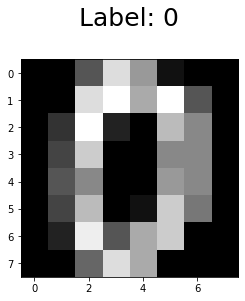

In [33]:
i = 0
plt.imshow(np.reshape(digits.data[i], (8, 8)), cmap='gray')
plt.title('Label: %i\n' % digits.target[i], fontsize=25)

KNeighborsClassifier

In [104]:
kneighbors = KNeighborsClassifier(n_neighbors=3)
kneighbors.fit(x_train,y_train)
predicted_kn = kneighbors.predict(x_test)
accuracy_kn = kneighbors.score(x_test, y_test, sample_weight=None)
print("Accuracy for kneighbors classifier is: {0:.2%}".format(accuracy_kn))

Accuracy for kneighbors classifier is: 98.22%


SGDClassifier

In [117]:
SGD = SGDClassifier(loss="log", penalty="l2")
SGD.fit(x_train,y_train)
predicted_sgd = SGD.predict(x_test)
accuracy_sgd = SGD.score(x_test, y_test, sample_weight=None)
print("Accuracy for Stochastic Gradient Descent classifier is: {0:.2%}".format(accuracy_sgd))

Accuracy for Stochastic Gradient Descent classifier is: 94.44%


DecisionTreeClassifier

In [120]:
DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(x_train,y_train)
predict_DTC = DTC.predict(x_test)
accuracy_DTC = DTC.score(x_test, y_test, sample_weight=None)
print("Accuracy for decision tree classifier is: {0:.2%}".format(accuracy_DTC))

Accuracy for decision tree classifier is: 84.22%
